In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./titanic.csv")

#QUESTION 1:

#First, I want to compute overall survival rate. Apparently it is 38%. That's crazy low.
survival_Rate = df['survived'].mean()

#This will return survival rate by class. 

passenger_Class_Rate =  df.groupby('pclass')['survived'].mean()

#Now we want to see how many of each gender of passenger has survived.

gender_Rate = df.groupby('sex')['survived'].mean()

#Next I want to find survival rate by age. The easiest way I could think of to do this was to
#create age groups. I got the idea to do this from stackoverflow. 
#https://stackoverflow.com/questions/34165876/trying-to-create-grouped-variable-in-python

ages = [0,12,18,24,65,80]
age_Ranges = ['0-12','13-18','19-24','25-65','65-80']

df['age categories'] = pd.cut(df['age'], bins = ages, labels = age_Ranges, right=False)

age_Survival_Rate = df.groupby('age categories',observed=False)['survived'].mean()

print(f'The overall survival rate is: {survival_Rate:.2f}')
print()
print(passenger_Class_Rate.round(2))
print()
print(gender_Rate.round(2))
print()
print(age_Survival_Rate.round(2))

The overall survival rate is: 0.38

pclass
1.0    0.62
2.0    0.43
3.0    0.26
Name: survived, dtype: float64

sex
female    0.73
male      0.19
Name: survived, dtype: float64

age categories
0-12     0.56
13-18    0.48
19-24    0.36
25-65    0.40
65-80    0.08
Name: survived, dtype: float64


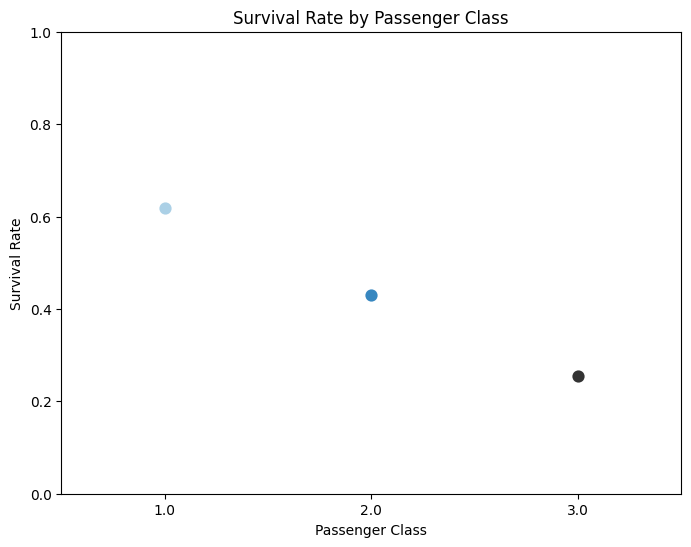

In [17]:
#QUESTION 2: 

#I finally found where the seaborn palettes were and it took me forever to find out how to make them work.
#https://www.practicalpythonfordatascience.com/ap_seaborn_palette yay

#Now I check how many passengers were in each class for the distribution. There are 323 passengers for first class, 277 in second, and 709 in 3rd.

passenger_class_counts = df['pclass'].value_counts().sort_index()

passenger_class_counts

#Yet when we look back at our passenger survival by class rate variable, we can see the majority of survivors
#were first class. That means the rich minority got preferential treatment when evacuating.
#Anecdotally, it could also be because the lower classes passengers had their quarters on lower levels of the ship.
#I recall from the Titanic movie how the class divisions were shown during evacuation. Thank you James Cameron.

plt.figure(figsize=(8, 6))
sns.pointplot(x=passenger_Class_Rate.index, y=passenger_Class_Rate.values, hue=passenger_Class_Rate.index, palette="Blues_d", legend=False)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

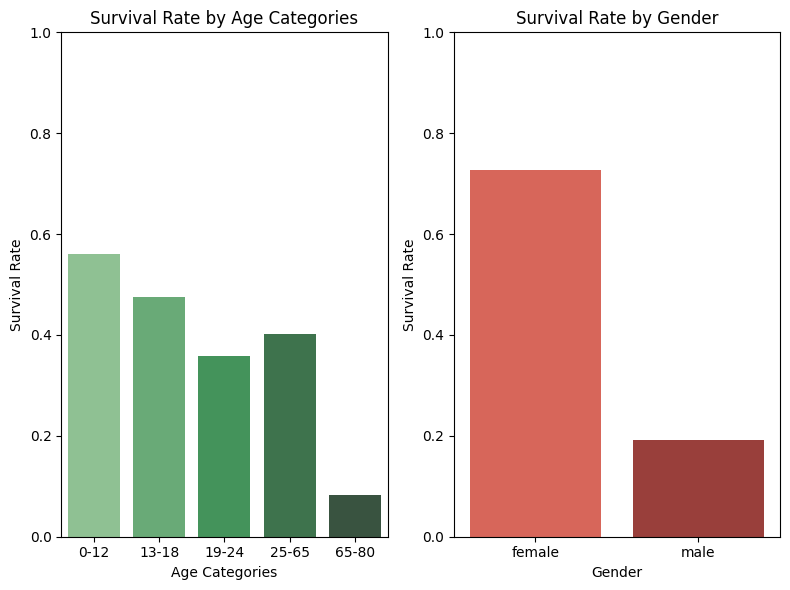

In [84]:
#QUESTION 3: 

age_Mean = df['age'].mean()
age_Median = df['age'].median()
age_Range = df['age'].max() - df['age'].min()

# Among total passengers, the mean age is 30, the median is 28, and the range is about 80 years.

fig, axes = plt.subplots(1, 2, figsize=(8, 6))

sns.barplot(x=age_Survival_Rate.index, y=age_Survival_Rate.values, hue=age_Survival_Rate.index, palette="Greens_d", ax=axes[0], legend=False)
axes[0].set_title('Survival Rate by Age Categories')
axes[0].set_xlabel('Age Categories')
axes[0].set_ylabel('Survival Rate')
axes[0].set_ylim(0, 1)

#Looking at the barplot, you can see that the overwhelming majority of survivors were children. 
#This is another thing I already knew due to James Cameron's Titanic. 

sns.barplot(x=gender_Rate.index, y=gender_Rate.values, hue=gender_Rate.index, palette="Reds_d", ax=axes[1], legend=False)
axes[1].set_title('Survival Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Survival Rate')
axes[1].set_ylim(0, 1)


plt.tight_layout()
plt.show()

#You didn't ask but I also included gender distribution. So, the overwhelming majority of survivors seemed to be
#1st class females aged 0-18.

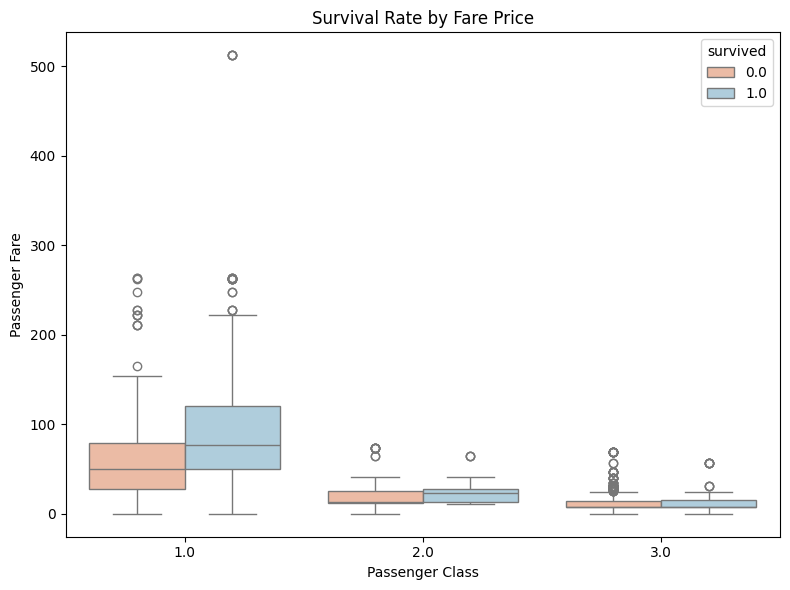

In [82]:
#QUESTION 4: 

#The mean fare price is around 33.3, while the maximum is 512. I *think* this lends into the fact that most
#passengers were lower class because lower class cabins typically cost less... becasuse they suck.

df['fare'].mean()
df['fare'].max()
df['fare'].min()

plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='fare', hue='survived', data=df,palette='RdBu')
plt.title('Survival Rate by Fare Price')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Fare')

plt.tight_layout()
plt.show()
#I believe the boxplots show that amoung the survivors, the fares paid are generally higher than among those who
#did not survive. You have a very extreme outlier it seems, with the maximum of 512. It looks like the most expensive
#ticket fare payer lived, Thomas Drake Martinez Cardeza. 

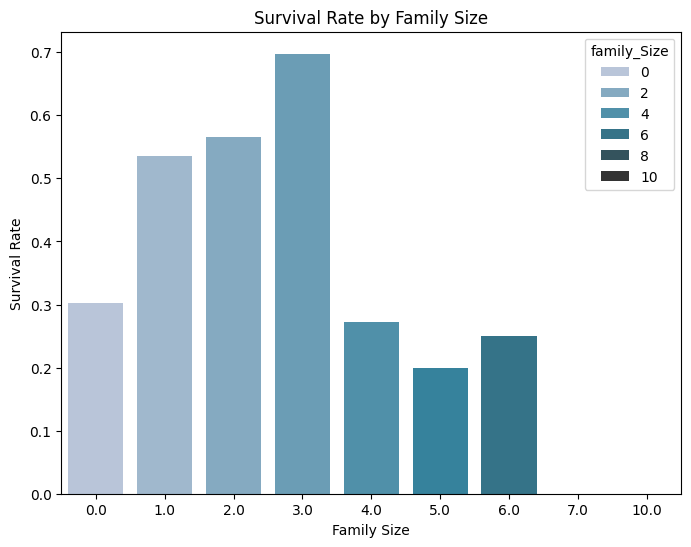

In [81]:
#QUESTION 5:

df['family_Size'] = df['sibsp'] + df['parch']
familySurvival = df.groupby('family_Size')['survived'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='family_Size', y='survived', data=familySurvival, hue='family_Size',palette='PuBuGn_d')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

plt.show()

#So it seems that larger families tended to not survive as much as smaller ones, and that families of about
#~3 people had the highest survival rate.


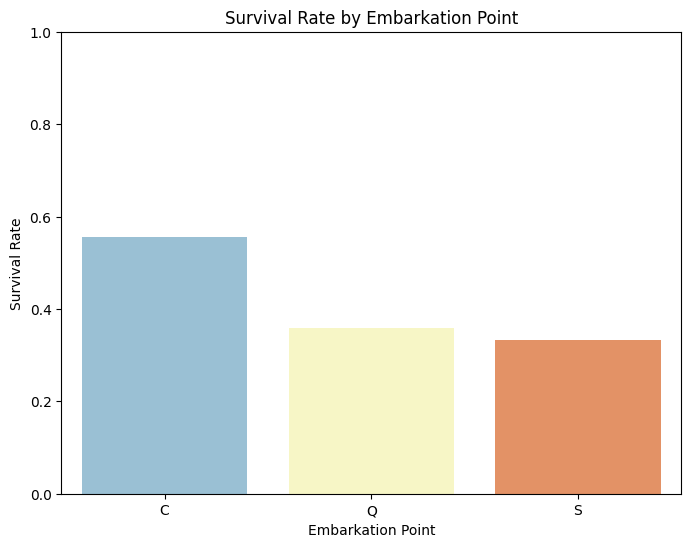

In [92]:
#QUESTION 6:

embarkation_Survival = df.groupby('embarked')['survived'].mean()

embarkation_Survival

#I don't really know how to interpret the different embark points. It looks like we have points c, q, and s.
#Point C has the highest survival rate.

plt.figure(figsize=(8, 6))
sns.barplot(x=embarkation_Survival.index, y=embarkation_Survival.values, hue=embarkation_Survival.index, palette="RdYlBu_r", legend=False)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)

plt.show()